# Modelos de Regresión Lineal
## Modelo con datos simulados
* y = a + b * x
* X : 100 valores distribuidos según una N(1.5, 2.5)
* Ye = 12 + 2.7 * X
* e estará distribuida según una N(0,0.8)

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mu = 1.5
sd = 2.5
n = 100
x = np.random.normal(mu,sd,n)
type(x)

numpy.ndarray

In [3]:
res = np.random.normal(0,2,n)

In [4]:
y_pred = 12 + 2.7 * x

In [5]:
y_act = 12 + 2.7*x + res

In [6]:
dif = y_pred - y_act
np.std(dif)

2.1562372419196576

In [7]:
np.mean(dif)

0.25551858461343274

In [8]:
data = pd.DataFrame(
    {
        "x":x.tolist(),
        "y_actual":y_act.tolist(),
        "y_prediccion":y_pred.tolist()
    }
)
data.head()

,x,y_actual,y_prediccion
0,-3.464379,0.504122,2.646177
1,6.163639,27.451250,28.641826
2,4.983080,22.496345,25.454316
3,3.007530,22.223985,20.120330
4,-0.910325,11.838810,9.542123


In [9]:
np.mean(y_pred)

16.590082397227153

In [10]:
y_mean = [np.mean(y_act) for i in range(1,len(x.tolist()) + 1)]

Text(0.5, 1.0, 'Valor Actual VS Prediccion')

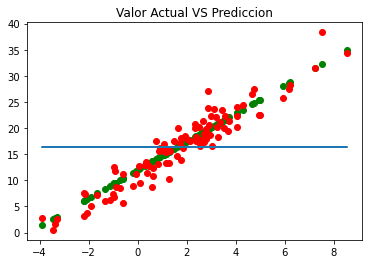

In [11]:
%matplotlib inline
plt.plot(x,y_pred,"go")
plt.plot(x,y_act,"ro")
plt.plot(x,y_mean)
plt.title("Valor Actual VS Prediccion")
# El porcentaje de error depende de la desviacion estandar de la lista de error

In [12]:
y_m = np.mean(y_act)
data["SSR"]=(data["y_prediccion"]-y_m)**2
data["SSD"]=(data["y_prediccion"]-data["y_actual"])**2
data["SST"]=(data["y_actual"]-y_m)**2

In [13]:
r2 = sum(data["SSR"])/sum(data["SST"])
r2

0.8196526183449968

In [14]:
data.head()

,x,y_actual,y_prediccion,SSR,SSD,SST
0,-3.464379,0.504122,2.646177,187.371929,4.588401,250.602895
1,6.163639,27.451250,28.641826,151.468710,1.417471,123.580721
2,4.983080,22.496345,25.454316,83.169884,8.749593,37.967549
3,3.007530,22.223985,20.120330,14.332028,4.425364,34.685284
4,-0.910325,11.838810,9.542123,46.137252,5.274772,20.211802


In [15]:
SSR = sum(data["SSR"])
SSD = sum(data["SSD"])
SST = sum(data["SST"])

In [16]:
SSR

4187.897740506596

In [17]:
SSD

471.4648790524144

In [18]:
SST

5109.356874821675

In [19]:
SSR+SSD

4659.36261955901

(array([ 2.,  0.,  1.,  8., 16., 20., 22., 20.,  8.,  3.]),
 array([-7.2635028 , -6.01343998, -4.76337716, -3.51331434, -2.26325152,
        -1.0131887 ,  0.23687412,  1.48693694,  2.73699976,  3.98706258,
         5.2371254 ]),
 <a list of 10 Patch objects>)

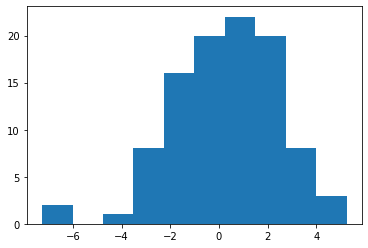

In [20]:
plt.hist(data["y_prediccion"]-data["y_actual"])
#Se distribuye en una distribucion normal

In [21]:
np.mean(data["y_prediccion"]-data["y_actual"])

0.25551858461343274

In [22]:
np.std(data["y_prediccion"]-data["y_actual"])

2.1562372419196576

## Obteniendo la recta de regresión 

* y = a + b * x
* b = sum((xi - x_m)*(y_i-y_m))/sum((xi-x_m)^2)
* a = y_m - b * x_m

In [23]:
x_mean = np.mean(data["x"])
y_mean = np.mean(data["y_actual"])

In [24]:
x_mean, y_mean

(1.7000305174915384, 16.334563812613723)

In [25]:
beta_n = sum((data["x"]-x_mean)*(data["y_actual"]-y_mean))/sum((data["x"]-x_mean)**2)

In [26]:
beta_n

2.849501398066146

In [27]:
alfa = y_mean - beta_n * x_mean
alfa

11.490324476266471

In [28]:
y_regrecion = alfa + beta_n * x

In [29]:
data["y_regrecion"] = y_regrecion.tolist()

Text(0.5, 1.0, 'Valor Actual VS Prediccion')

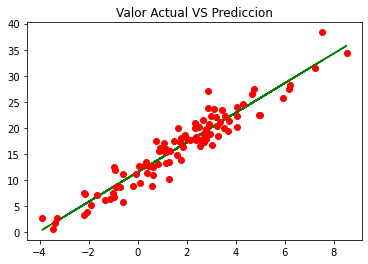

In [30]:
%matplotlib inline
plt.plot(x,y_regrecion,"g")
plt.plot(x,y_act,"ro")

plt.title("Valor Actual VS Prediccion")
# El porcentaje de error depende de la desviacion estandar de la lista de error

In [31]:
SSR = sum((data["y_regrecion"]-y_mean)**2)
STT = sum((data["y_actual"]-y_m)**2)
r2_regrecion = SSR / SST
r2_regrecion

0.9115121316636905

# Se obtiene los parametros de la distribucion normal de los errorres

In [32]:
Error = (data["y_regrecion"]-data["y_actual"])

In [33]:
np.mean(Error)

1.5631940186722204e-15

In [34]:
np.std(Error)

2.1263021855381554

(array([ 1.,  1.,  4.,  5., 16., 19., 25., 19.,  7.,  3.]),
 array([-7.34299706, -6.11671024, -4.89042342, -3.6641366 , -2.43784978,
        -1.21156296,  0.01472386,  1.24101068,  2.4672975 ,  3.69358432,
         4.91987114]),
 <a list of 10 Patch objects>)

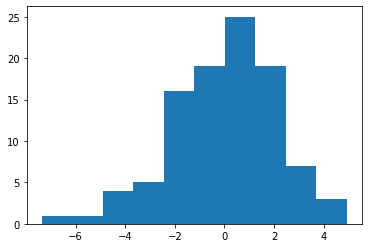

In [35]:
plt.hist(Error)

In [36]:
SSD = sum((data["y_regrecion"]-data["y_actual"])**2)

In [37]:
RSE = np.sqrt(SSD/(len(data)-2))
RSE

2.147889563208295

In [38]:
np.mean(data["y_actual"])

16.334563812613723

In [39]:
RSE / np.mean(data["y_actual"])

0.13149353651853696

Se observa un 13% de error

# Regreción Lineal con datos reales


In [40]:
mainpath = "E:/Curso de Python/Repositorio/python-ml-course/datasets/"
filepath = "ads/Advertising.csv"
data = pd.read_csv(os.path.join(mainpath,filepath))

In [41]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [42]:
import statsmodels.formula.api as smf

In [43]:
lm = smf.ols(formula = "Sales~TV", data = data).fit()

In [44]:
lm

In [45]:
type(lm)

statsmodels.regression.linear_model.RegressionResultsWrapper

In [46]:
# Ver los parámetros
lm.params

Intercept    7.032594
TV           0.047537
dtype: float64

TV será nuestra alfa y Intercept nuestra Beta
* El modelo sería:
* Sales = 7.032594 + 0.047537 * TV

# Se comprobarán los resultados aplicando la regreción lineal manualmente:

In [47]:
# y:Sales - x:TV
TV_mean = data["TV"].mean()
Sales_mean = data["Sales"].mean()
TV_mean, Sales_mean

(147.0425, 14.0225)

In [48]:
beta_Sales = sum((data["TV"]-TV_mean)*(data["Sales"]-Sales_mean))/sum((data["TV"]-TV_mean)**2)
alfa_Sales = Sales_mean - beta_Sales * TV_mean
alfa_Sales, beta_Sales

(7.032593549127704, 0.04753664043301969)

In [49]:
Sales_regrecion = alfa_Sales + beta_Sales * data["TV"]

Text(0.5, 1.0, 'Valor Actual VS Prediccion')

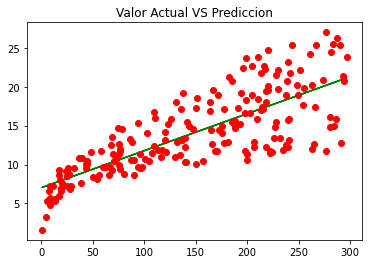

In [50]:
%matplotlib inline
plt.plot(data["TV"],Sales_regrecion,"g")
plt.plot(data["TV"],data["Sales"],"ro")

plt.title("Valor Actual VS Prediccion")

#### Si coinciden los parámetros

# Ahora con la libreria StatsModels

In [51]:
# Se pude preguntar al modelo los p-values
lm.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

Como son muy pequeños, se garantiza que no son pequeños

In [52]:
# Indice R^2
lm.rsquared

0.611875050850071

In [53]:
# Indice R^2 Ajustado
lm.rsquared_adj

0.6099148238341623

In [54]:
# Todos los valores a la vez:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sat, 08 Aug 2020   Prob (F-statistic):           1.47e-42
Time:                        15:30:13   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
lm.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.610    
Dependent Variable: Sales            AIC:                1042.0913
Date:               2020-08-08 15:30 BIC:                1048.6880
No. Observations:   200              Log-Likelihood:     -519.05  
Df Model:           1                F-statistic:        312.1    
Df Residuals:       198              Prob (F-statistic): 1.47e-42 
R-squared:          0.612            Scale:              10.619   
--------------------------------------------------------------------
              Coef.    Std.Err.      t      P>|t|    [0.025   0.975]
--------------------------------------------------------------------
Intercept     7.0326     0.4578   15.3603   0.0000   6.1297   7.9355
TV            0.0475     0.0027   17.6676   0.0000   0.0422   0.0528
------------------------------------------------------------------
Omnibus:              0.531         Durbin-Watson:           1.935
Prob(Omnibus):        0.767         Jarque-Bera (JB):        0.669
Skew:                 -0.089        Prob(JB):                0.716
Kurtosis:             2.779         Condition No.:           338  
==================================================================

"""

In [56]:
sales_pred = lm.predict(pd.DataFrame(data["TV"]))
sales_pred

0      17.970775
1       9.147974
2       7.850224
3      14.234395
4      15.627218
         ...    
195     8.848493
196    11.510545
197    15.446579
198    20.513985
199    18.065848
Length: 200, dtype: float64

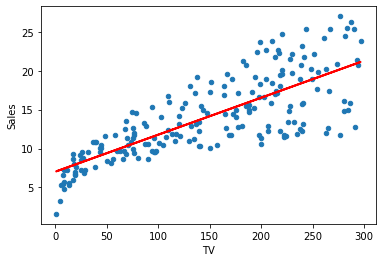

In [57]:
%matplotlib inline
data.plot(kind = "scatter", x = "TV", y ="Sales")
plt.plot(pd.DataFrame(data["TV"]), sales_pred, c="red", linewidth = 2)

In [58]:
sales_model = lm.params.Intercept + lm.params.TV * data["TV"]

In [59]:
SSD = sum((data["Sales"]-sales_model)**2)
SSD

2102.5305831313517

In [60]:
RSE = np.sqrt(SSD/(len(data)-2))
RSE
# Desviación estandar de los residuos o errores

3.258656368650463

In [61]:
sales_m = np.mean(data["Sales"])
sales_m

14.0225

In [62]:
error = RSE/sales_m
error
# Error del 23%

0.2323876889748948

(array([ 4., 10., 13., 17., 40., 42., 33., 16., 17.,  8.]),
 array([-8.38598196, -6.82614689, -5.26631183, -3.70647677, -2.14664171,
        -0.58680664,  0.97302842,  2.53286348,  4.09269854,  5.65253361,
         7.21236867]),
 <a list of 10 Patch objects>)

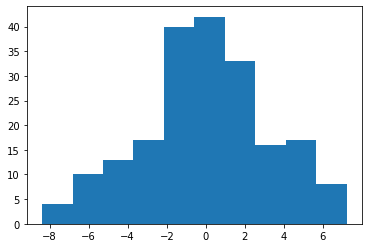

In [63]:
plt.hist((data["Sales"] - sales_model))

# Regresión lineal múltiple en Python
## El paquete statsmodel para regresión múltiple
* Sales ~TV
* Sales ~Newspaper
* Sales ~Radio
* Sales ~TV+Newspaper
* Sales ~TV+Radio
* Sales ~Newspaper+Radio
* Sales ~TV+Newspaper+Radio

In [64]:
# Añadir el Newspaper al modelo existente
lm2 = smf.ols(formula = "Sales~TV+Newspaper", data = data).fit()

In [65]:
lm2.params

Intercept    5.774948
TV           0.046901
Newspaper    0.044219
dtype: float64

In [66]:
lm2.pvalues

Intercept    3.145860e-22
TV           5.507584e-44
Newspaper    2.217084e-05
dtype: float64

Sales = 5.774948 + TV * 0.046901 + Newspaper * 0.044219

In [67]:
lm2.rsquared,lm2.rsquared_adj

(0.6458354938293271, 0.6422399150864777)

In [68]:
sales_pred = lm2.predict(data[["TV","Newspaper"]])

In [69]:
sales_pred

0      19.626901
1       9.856348
2       9.646055
3      15.467318
4      16.837102
         ...    
195     8.176802
196    10.551220
197    14.359467
198    22.003458
199    17.045429
Length: 200, dtype: float64

In [70]:
# Se calcula la desviacion estandar del error
sales_model2 = lm2.params.Intercept + lm2.params.TV * data["TV"] + lm2.params.Newspaper * data["Newspaper"]

In [71]:
SSD = sum((data["Sales"]-sales_model2)**2)
SSD

1918.5618118968275

In [72]:
RSE = np.sqrt(SSD/(len(data)-2))
RSE
# Desviación estandar de los residuos o errores

3.1128292790789294

In [73]:
error = RSE/sales_m
error
# Error del 22%

0.22198818178491206

In [74]:
np.std(data["Sales"] - sales_model2)
# Desviacion estandar calculada manualmente

3.0972260265411915

In [75]:
np.mean(data["Sales"] - sales_model2)
# Promedio casi llegando a 0

2.806643806252396e-15

(array([ 5.,  8., 14., 22., 51., 47., 23., 18., 10.,  2.]),
 array([-8.6230898 , -6.91565958, -5.20822935, -3.50079912, -1.7933689 ,
        -0.08593867,  1.62149155,  3.32892178,  5.036352  ,  6.74378223,
         8.45121245]),
 <a list of 10 Patch objects>)

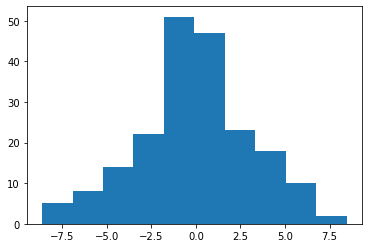

In [76]:
plt.hist((data["Sales"] - sales_model2))

In [77]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     179.6
Date:                Sat, 08 Aug 2020   Prob (F-statistic):           3.95e-45
Time:                        15:30:15   Log-Likelihood:                -509.89
No. Observations:                 200   AIC:                             1026.
Df Residuals:                     197   BIC:                             1036.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.7749      0.525     10.993      0.000       4.739       6.811
TV             0.0469      0.003     18.173      0.000       0.042       0.052
Newspaper      0.0442      0.010      4.346      0.000       0.024       0.064
==============================================================================
Omnibus:                        0.658   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.720   Jarque-Bera (JB):                0.415
Skew:                          -0.093   Prob(JB):                        0.813
Kurtosis:                       3.122   Cond. No.                         410.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Ahora se toma en cuenta la radio

In [78]:
# Añadir el Radio al modelo existente
lm3 = smf.ols(formula = "Sales~TV+Radio", data = data).fit()

In [79]:
lm3.params

Intercept    2.921100
TV           0.045755
Radio        0.187994
dtype: float64

In [80]:
lm3.pvalues

Intercept    4.565557e-19
TV           5.436980e-82
Radio        9.776972e-59
dtype: float64

In [81]:
# Se calcula la desviacion estandar
sales_model3 = lm3.params.Intercept + lm3.params.TV * data["TV"] + lm3.params.Radio * data["Radio"]

In [82]:
SSD = sum((data["Sales"]-sales_model3)**2)

In [83]:
SSD

556.9139800676181

In [84]:
RSE = np.sqrt(SSD/(len(data)-3))
RSE
# Desviación estandar de los residuos o errores

1.6813609125080007

In [85]:
error = RSE/sales_m
error
# Error del 11%

0.11990450436855059

In [86]:
np.std(data["Sales"] - sales_model3)
# Desviacion estandar calculada manualmente

1.668703059366193

In [87]:
np.mean(data["Sales"] - sales_model3)
# Desviacion estandar calculada manualmente

1.858069254012662e-14

(array([ 1.,  0.,  1.,  2.,  7., 19., 24., 62., 61., 23.]),
 array([-8.79769966, -7.63464601, -6.47159236, -5.30853871, -4.14548506,
        -2.98243141, -1.81937776, -0.65632411,  0.50672953,  1.66978318,
         2.83283683]),
 <a list of 10 Patch objects>)

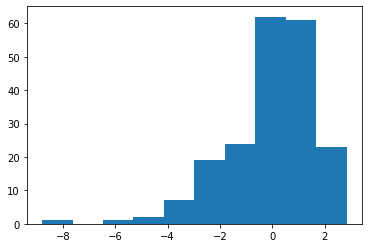

In [88]:
plt.hist((data["Sales"] - sales_model3))

In [89]:
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Sat, 08 Aug 2020   Prob (F-statistic):           4.83e-98
Time:                        15:30:15   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
Radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Añadimos los 3

In [90]:
# Añadir el todos los parámetros al modelo existente
lm4 = smf.ols(formula = "Sales~TV+Radio+Newspaper", data = data).fit()

In [91]:
lm4.params

Intercept    2.938889
TV           0.045765
Radio        0.188530
Newspaper   -0.001037
dtype: float64

In [92]:
lm4.pvalues

Intercept    1.267295e-17
TV           1.509960e-81
Radio        1.505339e-54
Newspaper    8.599151e-01
dtype: float64

In [93]:
sales_pred4 = lm4.predict(data[["TV","Radio","Newspaper"]])

In [94]:
SSD = sum((data["Sales"]-sales_pred4)**2)
RSE = np.sqrt(SSD/(len(data)-4))
RSE

1.6855103734147439

In [95]:
error = RSE/sales_m
error
# Error del 12%

0.12020041885646238

In [96]:
np.std(data["Sales"] - sales_pred4)
# Desviacion estandar calculada manualmente

1.6685701407225697

(array([ 1.,  0.,  0.,  3.,  7., 19., 24., 61., 62., 23.]),
 array([-8.8276871 , -7.66199613, -6.49630516, -5.33061419, -4.16492322,
        -2.99923225, -1.83354128, -0.66785031,  0.49784066,  1.66353163,
         2.8292226 ]),
 <a list of 10 Patch objects>)

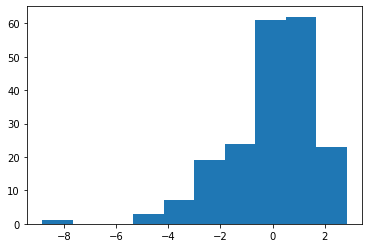

In [97]:
plt.hist((data["Sales"] - sales_pred4))

In [98]:
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sat, 08 Aug 2020   Prob (F-statistic):           1.58e-96
Time:                        15:30:16   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Como el p>|t| de Newspaper es casi llegando a 1, no es fiable, este es el caso que aunque el R^2 es muy alto indicando precision de los parámetros, el p-valor de Newspaper es muy alto, indicando que este parámetro no es significativo y se puede descartar.
Como el coeficiente de Newspaper es negativo, parece que invertir en publicidad en periodico resta ventas

## Multicolinealidad 
#### Factor Inflación de la Varianza
* VIF = 1 : Las variables no están correlacionadas
* VIF < 5 : Las variables tienen una correlación moderada y se pueden quedar en el modelo
* VIF >5 : Las variables están altamente correlacionadas y deben desaparecer del modelo.

In [99]:
# Newspaper ~ TV + Radio -> R^2 VIF = 1/(1-R^2)
lm_n = smf.ols(formula="Newspaper~TV+Radio", data = data).fit()
rsquared_n = lm_n.rsquared
VIF = 1/(1-rsquared_n)
VIF

1.1451873787239286

In [100]:
# Newspaper ~ TV + Radio -> R^2 VIF = 1/(1-R^2)
lm_n = smf.ols(formula="TV~Newspaper+Radio", data = data).fit()
rsquared_n = lm_n.rsquared
VIF = 1/(1-rsquared_n)
VIF

1.00461078493965

In [101]:
# Newspaper ~ TV + Radio -> R^2 VIF = 1/(1-R^2)
lm_n = smf.ols(formula="Radio~TV+Newspaper", data = data).fit()
rsquared_n = lm_n.rsquared
VIF = 1/(1-rsquared_n)
VIF

1.1449519171055353

In [102]:
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Sat, 08 Aug 2020   Prob (F-statistic):           4.83e-98
Time:                        15:46:50   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
Radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""